In [1]:
import gym
import random

from collections import namedtuple, deque
from time import sleep

In [2]:
import torch
import torch.nn.functional as F

from torch import nn, optim

In [3]:
device = torch.device('cpu')

In [4]:
env = gym.make('Pong-ramDeterministic-v4')

In [5]:
n = env.observation_space.shape[0]
a = 2#env.action_space.n

Hyperparameters

In [47]:
n_episodes = 10000
n_episodes_test = 100
lr = 1e-3
max_steps = 100

In [7]:
normalize = lambda x: (x / 127.5 - 1).astype(np.float32)

## Create Model

In [8]:
class Policy(nn.Sequential):  
    @torch.no_grad()
    def act(self, observation, probabilistic=True):
        if not torch.is_tensor(observation):
            observation = torch.tensor(observation, device=device)
            
        if not probabilistic: 
            return self(observation).max(dim=-1)[1].long()
        else:
            return torch.multinomial(F.softmax(self(observation), dim=-1), 1).long()
        
policy = Policy(nn.Linear(n, 20), nn.ReLU(), nn.Linear(20, a)).to(device)

In [9]:
optimizer = optim.Adam(policy.parameters(), lr)

## Train

In [10]:
rewards = []
losses = []

In [16]:
def train_one_step(states, actions, reward):
    states = torch.tensor(np.stack(states), device=device)
    actions = torch.tensor(np.stack(actions), device=device)
    
    optimizer.zero_grad()
    action_scores = policy(states)
    
    loss = F.cross_entropy(action_scores, actions)
    (reward * loss).backward()
    optimizer.step()
    
    return loss.item()

In [17]:
def test_one_episode():
    state = normalize(env.reset())
    done = False
    total_rewards = 0
    
    for step in range(max_steps):
        action = policy.act(state).item()
        next_state, reward, done, _ = env.step(action + 2)
        
        total_rewards += reward
        state = normalize(next_state)
        if done: break
            
    return total_rewards

In [49]:
pbar = tqdm(range(len(rewards) * 10, n_episodes))
for episode in pbar:
    state = normalize(env.reset())
    done = False
    
    states, actions = [], []
    for step in range(max_steps):
        action = policy.act(state).item()
        states.append(state); actions.append(action)
        
        state, reward, done, _ = env.step(action + 2)
        state = normalize(state); reward = np.float32(reward)

        if reward != 0: 
            loss = train_one_step(states, actions, reward)
            losses.append(loss)
            states.clear(); actions.clear()

        if done: break

    if not episode % 10: rewards.append(test_one_episode())
    pbar.set_description(f'{rewards[-1]:.2f}')

In [41]:
groupmean = lambda x, n=1: [sum(x[i:i + n]) / n for i in range(0, len(x) - n, n)]

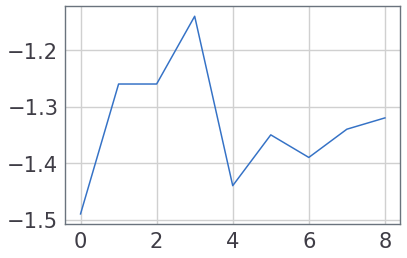

In [50]:
plot(groupmean(rewards, 100))

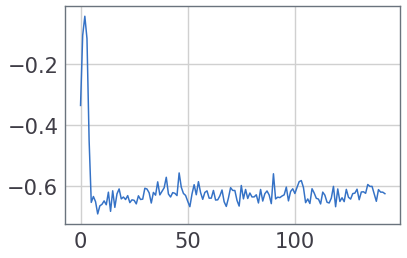

In [73]:
plot(groupmean(losses, 100))

In [71]:
for episode in tqdm(range(1)):
    state = normalize(env.reset())
    done = False
    total_rewards = 0

    for step in range(100):
        env.render()
        action = policy.act(state, probabilistic=False).item()
        with torch.no_grad():
            print(policy(torch.tensor(state, device=device)).cpu().numpy())
        state, reward, done, _ = env.step(action + 2)
        state = normalize(state)
        
        total_rewards += reward
        
        sleep(0.01)
        if done: break

    env.close()
    print(total_rewards)

[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
-2.0
